## 요청 라이브러리 : Requests

- !pip install requests
- HTTP 요청을 보내는데 사용하는 라이브러리 
- 클라이언트의 요청

In [ ]:
import requests

In [ ]:
print(requests.__version__)

2.27.1


In [ ]:
html = requests.get('http://www.paullab.co.kr/stock.html')
html

<Response [200]>

In [ ]:
html.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Document</title>\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css">\n  <link rel="stylesheet" type="text/css" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" crossorigin="anonymous">\n  <style>\n    h1{\n      margin: 2rem;\n    }\n    h1>span{\n      font-size: 1rem;\n    }\n    .main {\n      width: 80%;\n      margin: 0 auto;\n      text-align: center;\n    }\n\n    table {\n      width: 100%;\n    }\n\n    a {\n      color: inherit;\n      cursor: pointer;\n      text-decoration: none;\n    }\n\n    a:hover {\n      color: #000;\n      text-decoration: none;\n    }\n\n    em {\n      font: inherit;\n    }\n\n    #informa

In [ ]:
import json

body = { 'id': 'aaa', 'pw': 1234}
post = requests.post('url', data=json.dump(body))

In [ ]:
from bs4 import BeautifulSoup

html = requests.get('http://www.paullab.co.kr/stock.html')
text = html.text

In [ ]:
soup = BeautifulSoup(text, 'html.parser')

In [ ]:
print(soup)

In [ ]:
soup.title

<title>Document</title>

In [ ]:
soup.title.string

'Document'

In [ ]:
soup.table

In [ ]:
soup.find('table')

In [ ]:
soup.find_all('table')

In [ ]:
soup.find(id=('update'))

<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>

In [ ]:
soup.find_all('table', class_='table')

In [ ]:
tag = soup.find(id=('update'))

In [ ]:
dir(tag)

In [ ]:
tag.name

'span'

In [ ]:
tag['id']

'update'

In [ ]:
soup.select('#update')

[<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>]

In [ ]:
soup.select('.table')

In [ ]:
soup.select('.table > tbody')

In [ ]:
soup.select('.table > tbody > tr')

In [ ]:
one = soup.select()

## FinanceDataReader

- 주식 가격, 지수, 환율, 암호화폐 가격...
- 시계열 데이터 수집
- 거래소별, 종목(코드)별, 단축(코드)별 데이터 수집 가능

In [26]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import FinanceDataReader as fdr

In [28]:
df_krx = frd.StockListing('krx')

'''
KOSPI 코스피 종목, KODAQ 코스닥, NASDAQ 나스닥, NYSE 뉴욕증권거래서, S&P500 ...
'''

<Axes: xlabel='Date'>

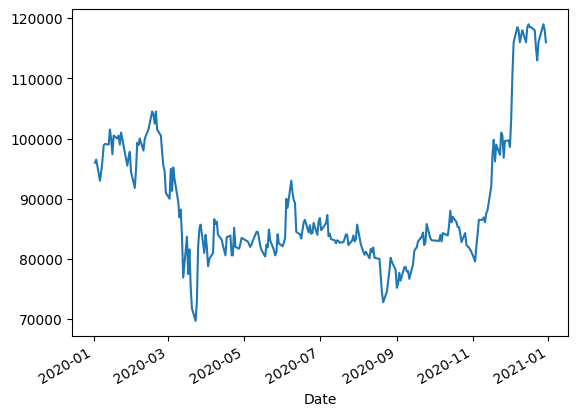

In [61]:
import FinanceDataReader as fdr

df_krx = frd.StockListing('krx')

sk_df_2020_ = fdr.DataReader('000660', '2020', '2021')

sk_df_2020_['Open'].plot()

In [30]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70400,1,1600,2.33,69800,70400,69500,14696073,1029334768050,420272691520000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,577000,2,-6000,-1.03,580000,583000,575000,71913,41655205000,135018000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,109200,1,5700,5.51,107500,109700,106100,6803692,732468826800,79497858258000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,779000,3,0,0.00,778000,782000,773000,13817,10749298000,55444546000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,702000,2,-10000,-1.40,708000,716000,697000,95049,67121442000,49555824786000,70592343,STK


In [31]:
df_krx.shape

(2717, 17)

In [34]:
samsaun_df = fdr.DataReader('005930')

In [35]:
samsaun_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-10,1653,1675,1604,1634,664282,NaN
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219
1999-02-18,1712,1721,1682,1687,440930,-0.032129
1999-02-19,1663,1663,1602,1653,503847,-0.020154
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [36]:
samsaung_df_2022_ = fdr.DataReader('005930', '2022', '2023') # 2022년부터 ~22 12월 마지막 날까지
samsaung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


In [37]:
samsaung_df_2022_ = fdr.DataReader('005930', '2022-01-03', '2022-03-31') # 2022년부터 ~22 12월 마지막 날까지
samsaung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
2022-01-10,78100,78100,77100,78000,9947422,-0.003831
2022-01-11,78400,79000,78000,78900,13221123,0.011538
2022-01-12,79500,79600,78600,78900,11000502,0.000000
2022-01-13,79300,79300,77900,77900,13889401,-0.012674


In [38]:
del_stock = fdr.DataReader('003497', exchange='krx-delisting') # 003497 상장 폐지 -> krx에는 데이터가 없음, exchange='krx-delisting'
del_stock

,Date,Code,Name,Market,SecuGroup,Close,UpDown,Change,ChangeRate,Open,High,Lower,Volume,Amount,MarCap
0,2001-04-13,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
1,2001-04-12,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
2,2001-04-11,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
3,2001-04-10,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
4,2001-04-09,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1998-04-30,003497,대한항공(2우B),KOSPI,주권,1915,1,5,0.26,1915,1915,1915,110,210650,660282425
754,1998-04-29,003497,대한항공(2우B),KOSPI,주권,1910,2,-95,-4.74,1910,1910,1910,430,821300,658558450
755,1998-04-28,003497,대한항공(2우B),KOSPI,주권,2005,1,5,0.25,2005,2005,2005,100,200500,691313975
756,1998-04-27,003497,대한항공(2우B),KOSPI,주권,2000,1,90,4.71,1910,2000,1910,260,501100,689590000


In [40]:
samsaung_df_2022_['Close']

Date
2022-01-03    78600
2022-01-04    78700
2022-01-05    77400
2022-01-06    76900
2022-01-07    78300
2022-01-10    78000
2022-01-11    78900
2022-01-12    78900
2022-01-13    77900
2022-01-14    77300
2022-01-17    77500
2022-01-18    77000
2022-01-19    76300
2022-01-20    76500
2022-01-21    75600
2022-01-24    75100
2022-01-25    74000
2022-01-26    73300
2022-01-27    71300
2022-01-28    73300
2022-02-03    73300
2022-02-04    74000
2022-02-07    73000
2022-02-08    73500
2022-02-09    74700
2022-02-10    75400
2022-02-11    74900
2022-02-14    73700
2022-02-15    73700
2022-02-16    74800
2022-02-17    75000
2022-02-18    74300
2022-02-21    74200
2022-02-22    73400
2022-02-23    73000
2022-02-24    71500
2022-02-25    71900
2022-02-28    72100
2022-03-02    71700
2022-03-03    72900
2022-03-04    71500
2022-03-07    70100
2022-03-08    69500
2022-03-10    71200
2022-03-11    70000
2022-03-14    70200
2022-03-15    69500
2022-03-16    70400
2022-03-17    71200
2022-03-18    7

<Axes: xlabel='Date'>

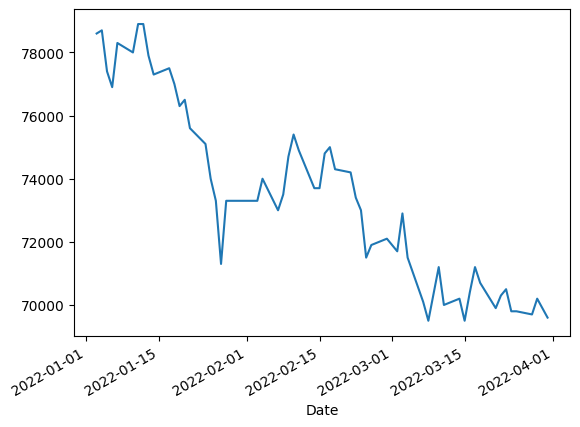

In [39]:
samsaung_df_2022_['Close'].plot()

<Axes: xlabel='Date'>

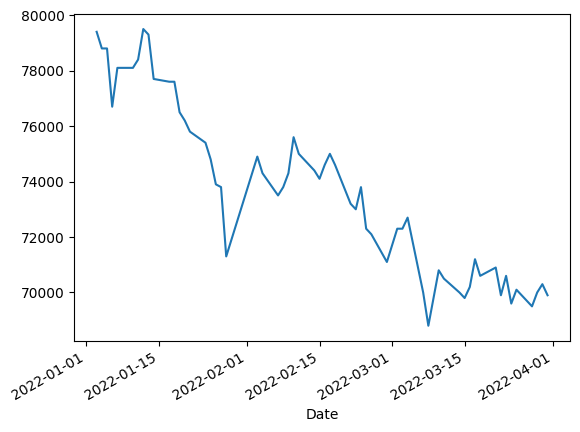

In [41]:
samsaung_df_2022_['Open'].plot()

In [44]:
ex_us_kw_df = fdr.DataReader('USD/KRW', '2023')


'''
EUR/USD(유로당 달러), CNY/KRW(위엔당 원), JPY/KRW(엔당 원), USD/JPY(달러당 엔) ...
'''

ex_us_kw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1260.910034,1273.930054,1256.550049,1260.910034,1260.910034,0
2023-01-03,1270.099976,1278.969971,1264.390015,1270.099976,1270.099976,0
2023-01-04,1279.079956,1279.719971,1267.560059,1279.079956,1279.079956,0
2023-01-05,1271.079956,1278.229980,1265.739990,1271.079956,1271.079956,0
2023-01-06,1274.180054,1274.180054,1253.010010,1274.180054,1274.180054,0
...,...,...,...,...,...,...
2023-05-22,1324.209961,1324.219971,1312.430054,1324.209961,1324.209961,0
2023-05-23,1313.829956,1321.729980,1308.260010,1313.829956,1313.829956,0
2023-05-24,1319.839966,1320.300049,1314.089966,1319.839966,1319.839966,0


In [47]:
btc_krw_df = fdr.DataReader('BTC/KRW', '2023')
btc_krw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,20881980.0,20983694.0,20848310.0,20976934.0,20976934.0,11664205615481
2023-01-02,20977476.0,21355044.0,20930146.0,21196110.0,21196110.0,15365444804389
2023-01-03,21196588.0,21310532.0,21286596.0,21340292.0,21340292.0,17787669052216
2023-01-04,21340738.0,21612098.0,21267144.0,21440006.0,21440006.0,23421496568532
2023-01-05,21440302.0,21411704.0,21411510.0,21458506.0,21458506.0,17451489256812
...,...,...,...,...,...,...
2023-05-22,35937472.0,36132932.0,35393188.0,35454384.0,35454384.0,11459626783399
2023-05-23,35449176.0,35568568.0,35105516.0,35287412.0,35287412.0,14530586645292
2023-05-24,35293568.0,35985904.0,35170116.0,35943132.0,35943132.0,18082910616976


<Axes: xlabel='Date'>

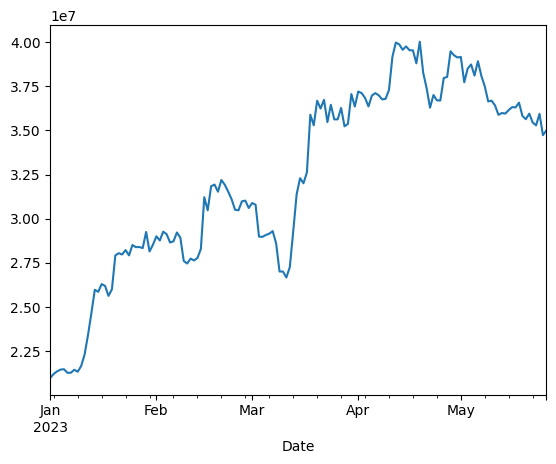

In [48]:
btc_krw_df['Close'].plot()

In [ ]:
# !pip install pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [ ]:
def pdf2txt(pdf_file):
    rsrcmgr = PDFResourceManager()
   
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(pdf_file, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,
                                 caching=caching, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    return text

In [ ]:
# pdf 파일 불러오기

import os
os.chdir('C:\workspace')
os.listdir('sample/')
pdf_path='sample/「인공지능 업무자동화교육」 참가신청서.pdf'

In [ ]:
text = pdf2txt(pdf_path)
text # text 파일로 변환해줌

# 연습문제

- Requests, BeatifulSoup을 이용해서 데이터를 가져와야하는데
- http://www.paullab.co.kr/stock.html 데이터 중 main 클래스의 2번째(1 인덱스)값을 가져와주세요.

In [ ]:
soup = BeautifulSoup(text, 'html.parser')

In [54]:
import requests
from bs4 import BeautifulSoup

html = requests.get('http://www.paullab.co.kr/stock.html')

text = html.text

soup = BeautifulSoup(text, 'html.parser')

result = soup.select('.main')[1]

print(result)

<div class="wrap main">
<div class="cat-img">
<img alt="(주)캣네가게 주가" src="cats_stock.png"/>
</div>
<div class="tables">
<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>
<table class="border-style" summary="업종상세 정보">
<tr>
<th class="strong" scope="row">현재가</th>
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">52주 최고 <span class="bar">l</span> 최저</th>
<td>
<em>62,800</em>
<span class="bar">l</span>
<em>42,300</em>
</td>
</tr>
<tr>
<th scope="row">배당수익률 <span class="bar">l</span><span> 2019.12</span>
<a alt="배당수

In [55]:
import requests
from bs4 import BeautifulSoup

html = requests.get('http://www.paullab.co.kr/stock.html')

text = html.text

soup = BeautifulSoup(text, 'html.parser')

soup.select('.table > tbody > tr')
body > div:nth-child(3)

[<tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>,
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>,
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,830</spa

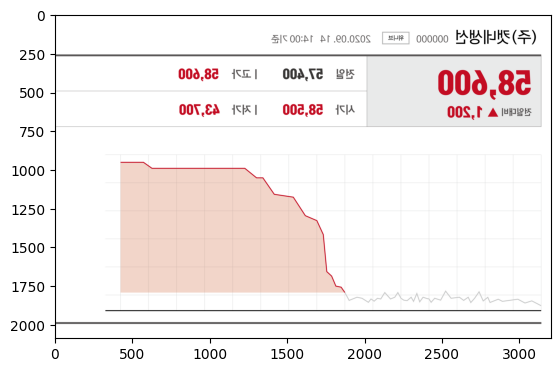

In [59]:
||from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

cats_stock = Image.open('cats_stock.png')
pixel = np.array(cats_stock)

#좌우
plt.imshow(pixel[:, ::-1])
#상하
plt.imshow(pixel[::-1])||

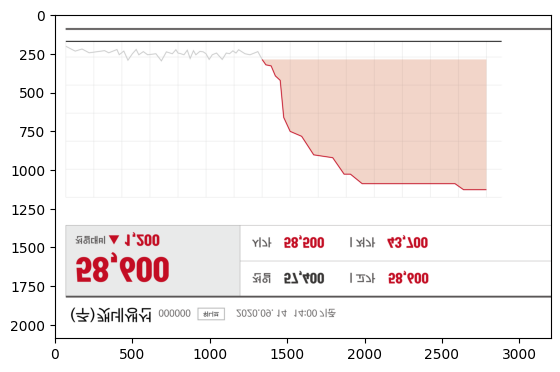

In [60]:
plt.imshow(pixel[::-1])